# Project Scientific Methodology

## MOSIG M2/AISSE - Gabriel Benevides
### Université Grenoble-Alpes

##### This project is available at the [github repository](https://github.com/GBenevides/reproducibleResearchProject) for consulation purposes. 


This study will consist of basic processing and analysis of data concerning purchasing power of English workers from the 16th to the 19th century. We are interested in obtaining the [csv version](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) of the original data made available by William Playfair, one of the pioneers of the graphical presentation of data, on his book ["A Letter on Our Agricultural Distresses, Their Causes and Remedies"](https://books.google.fr/books/about/A_Letter_on_Our_Agricultural_Distresses.html?id=aQZGAQAAMAAJ). With this data we will try to demonstrate, through a series of 3 graphics, how the purchase power of a *"good mechanic"* evolved from 1565 to 1821. His original intention was to argue that: _working men had never had such strong power of purchase as they had toward the end of this period_.

With that said, we would like to oberserve the trend and corroborate visually if his statement is true or not, while demonstrating clearly the process conducted in order to establish a _reproductible research_ . We will therefore compare the worker's weekly wage with their capacity to buy a quarter of wheat, which is around 6.8 kilograms. The visualisation will be produced through 3 different ways:

- We will attempt to reproduce PLayfair's original visualisation from the numerical data. Showing both the wages and the price of wheat across the years in the same plot. Like his graphic, the wheat price will be represented by bars, in our case green, and the Wages by a blue surface delimited by a red curve.


- The second graph will be an attempt to show the two quantities (wheat price, salary) on two different axes, without an explicit time axis. The advancement of time in this plot will be achieved in a different way.


- We intend to make a plot of the purchasing power, defined as the quantity of wheat a worker can buy with a weekly salary, as a function of time. In other words, based on our units, we want to show what fraction of a quarter of wheat a worker can buy with his weekly wages across time. In this case we expect to see a growing trend, to corroborate Playfair's original statement. 


Now that our intentions and methodology have been defined, we can move on to the code:

In [1]:
#We start by importing all special libraries we will need for the data processing and plotting
import pandas as pd 
import matplotlib.pyplot as plt
import isoweek
import numpy as np

In [22]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv") # Importing csv data made available online
data = raw_data[['Year','Wheat','Wages']] # Cleaning first row of the dataframe
cleanData = data[np.isnan(data.Wages)== False] #Eliminating three last years of data because Wheat prince info isn't available
cleanData.tail() # We verify the last elements to make sure we have a valid dataframe

,Year,Wheat,Wages
45,1790,47.5,25.5
46,1795,76.0,27.5
47,1800,79.0,28.5
48,1805,81.0,29.5
49,1810,99.0,30.0


#### Estimating the Purchase Power

Now we will proceed to generating an extra column of data, which will contain the worker's **purchase power**. By dividing the wages by the price of wheat for each sample, we will obtain the _fraction of a quarter of wheat a worker can buy with the ammount of money he earns in a week_ . This will in turn be plotted so that we can analyse the trend over time. 

In [11]:
wheatPerSalary = [] # We initialize an empty list to eventually fill with our values.
for element in cleanData.itertuples(): # Iterating each entry on the dataframe
	wheatPerSalary.append(element.Wages/element.Wheat)
finalData = cleanData.assign(QuartersPerWeekSalary = wheatPerSalary) # We assign the extra column to the dataframe
finalData.head() # We verify our final version

,Year,Wheat,Wages,QuartersPerWeekSalary
0,1565,41.0,5.00,0.121951
1,1570,45.0,5.05,0.112222
2,1575,42.0,5.08,0.120952
3,1580,49.0,5.12,0.104490
4,1585,41.5,5.15,0.124096


#### First Plot - Reproduciton of Fairview's Visualization

Here we have reporduced the original plot in its main ideas. Both quantities are present in the graph and each extremety contains the axis with values corresponding to each column, wages and wheat, respectively. 

We can see that both quantities have generally grown over the period studied. However, the wages have had a more stable, growth whereas the wheat prices tend to vary much more. Both values have reached historic highs by the beggining of the 19th century. 

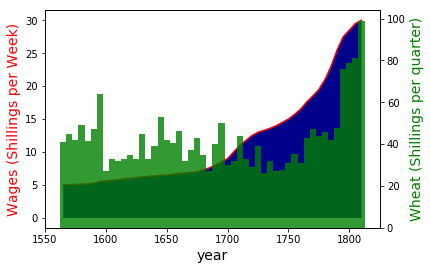

In [15]:
#Original reproduction
fig,axis = plt.subplots() # We must break this graphic into two subplots.

axis.plot(finalData.Year, finalData.Wages, color = "red")
axis.set_xlabel("year", fontsize = 14)
axis.set_ylabel("Wages (Shillings per Week)", color = "red", fontsize = 14) # We must set two different descriptions for each axis
axis.fill_between(finalData.Year, finalData.Wages, 0, facecolor = 'darkblue', interpolate = True) # Filling the blue area

axis2 = axis.twinx()
axis2.bar(finalData.Year,finalData.Wheat, color = 'green', width = 5, alpha = 0.8)
#axis2.plot(cleanData.Year, cleanData.Wheat, color = "green", marker = "o") # If we want markers at the tips of green bars
axis2.set_ylabel("Wheat (Shillings per quarter)", color = "green", fontsize = 14)

plt.show()

#### Second Plot - Showing each quantity in a different axis

In this second plot we experiment with a new form of showing time advancement. We will plot each quantity in a different axis and we'll label a few points in the graph with a text tho indicate the year the values correspond to. This graphic will be interesting to show how volatile wheat prices can be in the earlier period of sampling. As time moves on, we can see that wages increase steadly, on the other hand. 

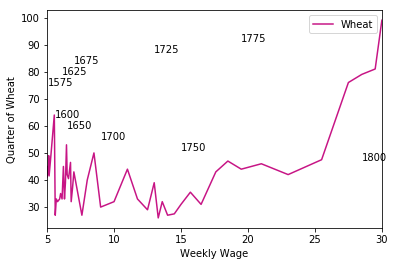

In [69]:
#Different advancement of time approach
# Here we construct a basic plot with the Wages in the x-axis and the wheat prices in the y-axis
cleanData.plot(kind = "line", x = 'Wages', y  = 'Wheat', color='mediumvioletred') 

#Variables to distance the labels from each other
shift = 1
space = 5

# It was decided to add labels to the points to show the advancement of time
# In order to facilitate visual comprehension not all point will be labeled as this would generate visual pollution
#As such, only values for years that end in 0, 50 or 75 will be labeled. 

# Iteration to assign each label
for element in cleanData.itertuples():
    plotBoolean = int(element.Year)%100 == 0 or int(element.Year)%100 == 50 or int(element.Year)%100 == 75 or int(element.Year)%100 == 25 
    if plotBoolean :
        plt.text(element.Wages, 70 +(space*shift ), str(element.Year), color='black')        
        shift =  shift * (-1) 
        space +=2
        
plt.ylabel('Quarter of Wheat')
plt.xlabel('Weekly Wage')
plt.show()

#### Third Plot: Purchase Power

In this final plot we can finally observe the variable __purchase power__ over time. As previously stated, this variable consists of the ammount of wheat a worker can buy with his weekly wage, in terms of a quarter of wheat (6.8 kilograms approximately). 

To synthesize the study, we can see that the purchase power of the workers tends to incresase over time, with a few fluctuations over the years. These periods reflect different socio-economic policies taken by different monarks over the years, as well as other historical factors that can influence market prices and agriculture. In the last samples of data, the price of the quarter of wheat increased drastically, which explains why that, around 1800 the purchase power also fell strongly in relation to previous years. 

Yet, overall the standards still have **greatly improved** since the beggnining of the period, around 1565. Indeed, if on that year a "good mechanic" could buy 0.12195 quarters of wheat, that is approximately 0.83 kilograms, with a week's salary, by 1805 he could already buy approximately 2.48 kilograms of wheat with a week's salary. 

This all goes to show that, overall, **Fairview's original proposition holds.**

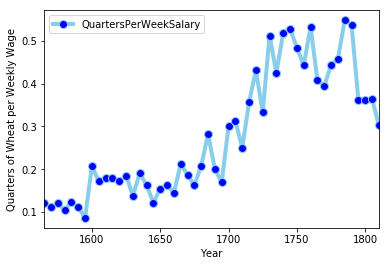

In [82]:
#Purchase power
finalData.plot( x = 'Year', y= 'QuartersPerWeekSalary', marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4) #
plt.ylabel('Quarters of Wheat per Weekly Wage')
plt.show()